 eigenvalues in diagonal matrix 
 [[0.00964683 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.05953009 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.144559   0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.2712889  0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.44053915 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.45756912
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.2980154  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.17428527 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.02951196 0.     

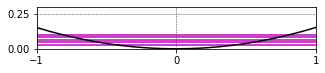

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import scipy.integrate as integrate
import math

class Matrix(): #this will make my matrix elements
    masse= 0.00054858
    u= 1.00784/(2*masse)
    w= 0.01822

    def __init__(self, m, n, L):
        self.m= m
        self.n= n
        self.L= L

    def wave_m(self, x): # wavefunction_m
        inside = (self.m * math.pi * (x + self.L/2) / self.L)
        return math.sqrt(2/self.L) * math.sin(inside)

    def wave_n(self, x): # wavefunction_n
        inside = (self.n * math.pi * (x + self.L/2) / self.L)
        return math.sqrt(2/self.L) * math.sin(inside)

    def tsol(self): #I already know what <n|T|n> equals
        return ((self.n**2)*(math.pow(math.pi, 2)) / (2 * Matrix.u * math.pow(self.L, 2)))

    def vsol(self,x): #V(x)
        return (0.5 * Matrix.u * math.pow(Matrix.w, 2) * x**2)

    def mwaven_int(self): # <m|V(x)|n>
        fun_i= lambda x: self.wave_m(x) * self.vsol(x) * self.wave_n(x)
        return integrate.quad(fun_i, -self.L/2, self.L/2)

    # i am throwing these in for the plotting part of the homework, they have nothing to do with the matrix elements of this class
    def energylev(self, v):
        return 1*Matrix.w*(v+0.5)

def main():
    bigm = np.zeros((10,10)) #Intialize 10x10 matrix
    for m in range(1,11): #iterate through m
        for n in range(1,11): #iterate through n
            matrix_elem= Matrix(m,n,4) #create Matrix element object
            if m==n: #if m==n then H= <n|T|n> + <m|V|n>
                bigm[m-1,n-1]= matrix_elem.tsol()+ matrix_elem.mwaven_int()[0] 
            else: #if m=/=n then H= <m|V|n>
                bigm[m-1,n-1]= matrix_elem.mwaven_int()[0]
                
    bigm_eig, evecs= la.eig(bigm) #extract the eigenvalues
    bigm_eig= bigm_eig.real #the eigenvalues are real numbers
    bigm_diag= np.diag(bigm_eig) #diagonal matrix of the eigenvalues
    print(f" eigenvalues in diagonal matrix \n {bigm_diag}")

    #getting the exact energy levels
    y= []
    y1=[]
    x1=[]
    y_cm=[]
    for v in range(1,6):
        y.append(matrix_elem.energylev(v))
        blah= y[v-1]*219474.6 #h to cm^-1
        y_cm.append(blah)
    print(f"{y_cm} energy in cm^1")
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1, 1, 1, aspect=1)
    ax.hlines(y, -1, 1, 'm')

    #plotting the potential energy
    for x in np.arange(-1,2,0.1):
        y1.append(matrix_elem.vsol(x))
        x1.append(x)
    ax.plot(x1,y1, 'k')
    ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
    plt.xlim(-1, 1)
    plt.ylim(0,0.3)
    plt.locator_params(axis='y', nbins=1) #weird parameters because i am bad at matplotlib
    plt.locator_params(axis='x', nbins=2)
    plt.show()

if __name__ == "__main__":
    main()